# xml轉成csv檔

## 將1個xml檔的CompressionDepthStats印出來

In [28]:
from xml.etree import ElementTree

tree = ElementTree.parse("20230516-1_16052023_1030.xml")
root = tree.getroot()


compression_depth_stats = root.find("CompressionDepthStats")
too_shallow = compression_depth_stats.find("TooShallow").text
adequate_depth = compression_depth_stats.find("AdequateDepth").text
too_deep = compression_depth_stats.find("TooDeep").text
   
print(f"{too_shallow},{adequate_depth},{too_deep}")
    
    


23,30,11


## 將1個xml檔的CompressionSamples印出來

In [23]:
from xml.etree import ElementTree
root = tree.getroot()

compression_samples = root.find("CompressionSamples")

for sample in compression_samples:
    time_ms = sample.attrib["ms"]
    value = sample.text
    print(f"Time (ms): {time_ms}, Value: {value}")

Time (ms): 49120, Value: 0
Time (ms): 49139, Value: 0
Time (ms): 49140, Value: 3
Time (ms): 49160, Value: 17
Time (ms): 49180, Value: 23
Time (ms): 49200, Value: 30
Time (ms): 49220, Value: 36
Time (ms): 49240, Value: 39
Time (ms): 49340, Value: 36
Time (ms): 49360, Value: 33
Time (ms): 49380, Value: 28
Time (ms): 49400, Value: 23
Time (ms): 49420, Value: 18
Time (ms): 49440, Value: 13
Time (ms): 49460, Value: 10
Time (ms): 49480, Value: 7
Time (ms): 49500, Value: 6
Time (ms): 49680, Value: 7
Time (ms): 49700, Value: 11
Time (ms): 49720, Value: 17
Time (ms): 49740, Value: 23
Time (ms): 49760, Value: 28
Time (ms): 49780, Value: 33
Time (ms): 49800, Value: 36
Time (ms): 49820, Value: 38
Time (ms): 49920, Value: 36
Time (ms): 49940, Value: 31
Time (ms): 49960, Value: 25
Time (ms): 49980, Value: 20
Time (ms): 50000, Value: 16
Time (ms): 50020, Value: 13
Time (ms): 50040, Value: 10
Time (ms): 50060, Value: 9
Time (ms): 50080, Value: 8
Time (ms): 50100, Value: 7
Time (ms): 50120, Value: 6
Ti

## 將1個xml檔轉成csv檔

In [24]:

import csv
from xml.etree import ElementTree

tree = ElementTree.parse("20230516-1_16052023_1030.xml")
root = tree.getroot()

compression_samples = root.find("CompressionSamples")

# 創建CSV文件並打開以寫入模式
with open("20230516-1_16052023_1030.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)

    # 寫入CSV文件的標題行
    writer.writerow(["Time (ms)", "Value"])

    # 遍歷每個sample並寫入CSV文件
    for sample in compression_samples:
        time_ms = sample.attrib["ms"]
        value = sample.text
        writer.writerow([time_ms, value])

print("CSV文件寫入完成。")


CSV文件寫入完成。


## 將某資料夾的所有xml檔轉成csv檔

In [27]:
import os
import csv
from xml.etree import ElementTree

# 資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/XML'

# 遍歷資料夾中的所有檔案
for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        # 取得XML檔案的完整路徑
        xml_file = os.path.join(folder_path, filename)

        # 讀取XML檔案
        tree = ElementTree.parse(xml_file)
        root = tree.getroot()

        # 提取需要的資料，並準備寫入CSV檔案
        compression_samples = root.find("CompressionSamples")

        # 建立CSV檔案路徑
        csv_file = os.path.splitext(xml_file)[0] + ".csv"

        # 打開CSV檔案以寫入模式
        with open(csv_file, "w", newline="") as csvfile:
            writer = csv.writer(csvfile)

            # 寫入CSV檔案的標題行
            writer.writerow(["Time (ms)", "Value"])

            # 遍歷每個sample並寫入CSV檔案
            for sample in compression_samples:
                time_ms = sample.attrib["ms"]
                value = sample.text
                writer.writerow([time_ms, value])

        print(f"已將{xml_file}轉換為{csv_file}")

print("所有XML檔案轉換完成。")


已將C:/Users/xiang/Desktop/QCPR按壓結果/XML\20230516-1_16052023_1030.xml轉換為C:/Users/xiang/Desktop/QCPR按壓結果/XML\20230516-1_16052023_1030.csv
已將C:/Users/xiang/Desktop/QCPR按壓結果/XML\20230516-2_16052023_1036.xml轉換為C:/Users/xiang/Desktop/QCPR按壓結果/XML\20230516-2_16052023_1036.csv
已將C:/Users/xiang/Desktop/QCPR按壓結果/XML\20230516-3_16052023_1040.xml轉換為C:/Users/xiang/Desktop/QCPR按壓結果/XML\20230516-3_16052023_1040.csv
已將C:/Users/xiang/Desktop/QCPR按壓結果/XML\20230516-4_16052023_1047.xml轉換為C:/Users/xiang/Desktop/QCPR按壓結果/XML\20230516-4_16052023_1047.csv
已將C:/Users/xiang/Desktop/QCPR按壓結果/XML\20230516-5_16052023_1050.xml轉換為C:/Users/xiang/Desktop/QCPR按壓結果/XML\20230516-5_16052023_1050.csv
所有XML檔案轉換完成。


# 將csv檔讀出來劃出圖

## 讀取QCPR的數值

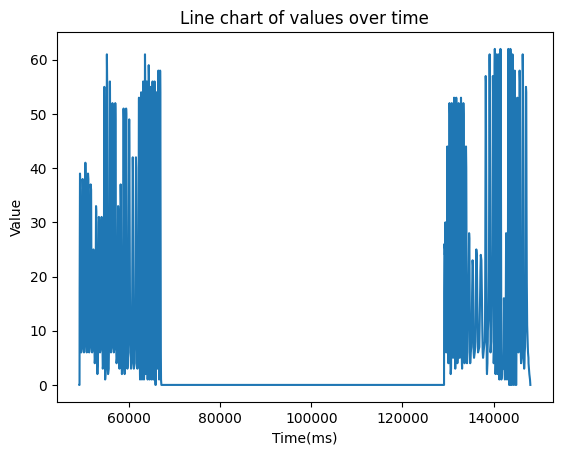

In [5]:
#讀一個CSV文件
from xml.etree import ElementTree
import pandas as pd
import matplotlib.pyplot as plt
# df = pd.read_csv('20230516-1_16052023_1030.csv')

# tree = ElementTree.parse("20230516-1_16052023_1030.csv")
# root = tree.getroot()
# 


# 讀取CSV文件
df = pd.read_csv('20230516-1_16052023_1030.csv')
# df.head()

# 提取時間和值的欄位
time = df['Time (ms)']
value = df['Value']

# 繪製折線圖
plt.plot(time, value)
plt.xlabel('Time(ms)')
plt.ylabel('Value')
plt.title(' Press Deep line chart')
plt.show()

# compression_depth_stats = root.find("CompressionDepthStats")
# too_shallow = compression_depth_stats.find("TooShallow").text
# adequate_depth = compression_depth_stats.find("AdequateDepth").text
# too_deep = compression_depth_stats.find("TooDeep").text
   
# print(f"{too_shallow},{adequate_depth},{too_deep}")

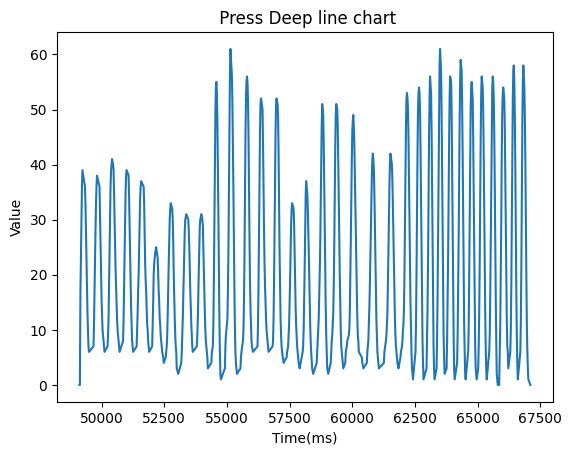

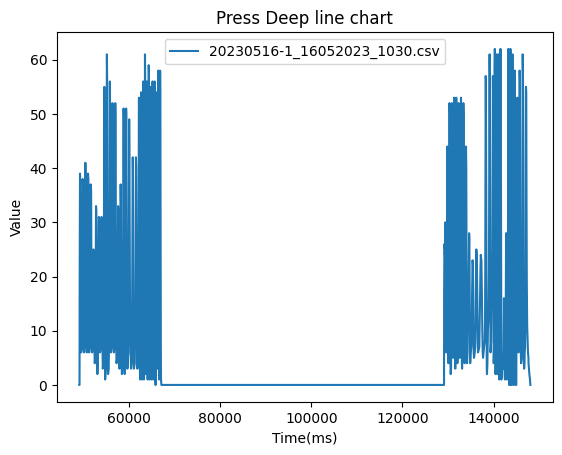

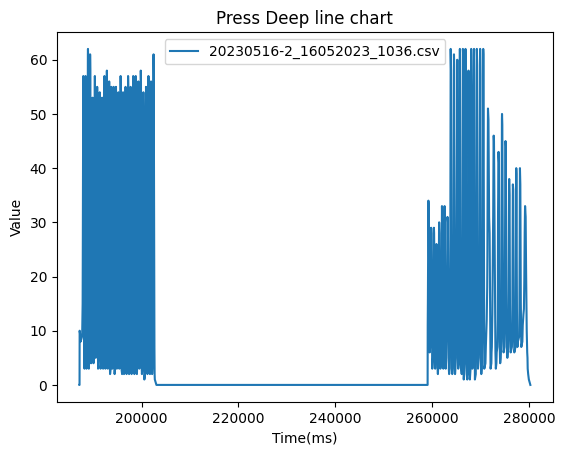

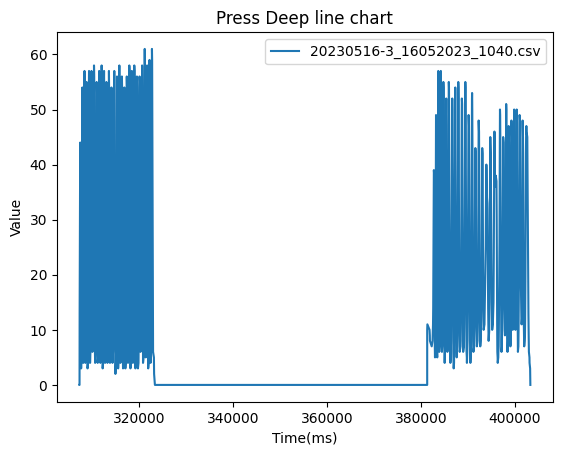

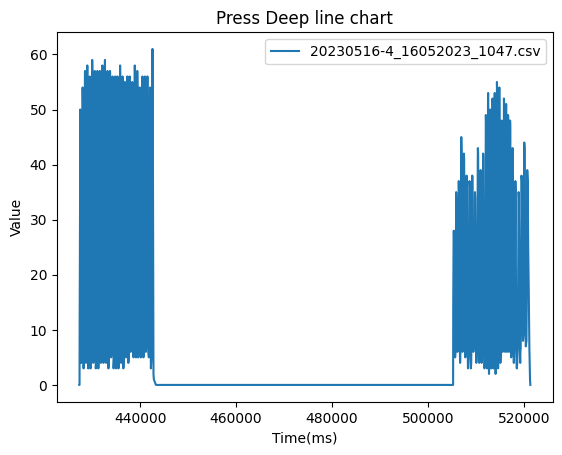

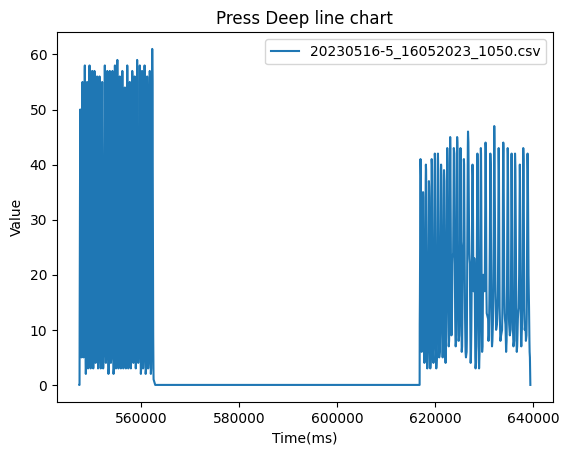

In [3]:
#讀多個CSV文件
import os
import pandas as pd
import matplotlib.pyplot as plt

# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/XML'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 逐一讀取CSV檔案並畫出折線圖
for file_name in file_names:
    # 構造完整的檔案路徑
    file_path = os.path.join(folder_path, file_name)
    
    # 讀取CSV檔案
    df = pd.read_csv(file_path)
    
    # 提取時間和值的欄位
    time = df['Time (ms)']
    value = df['Value']
    
    # 繪製折線圖
    plt.plot(time, value, label=file_name)  # 將檔案名稱作為折線圖的標籤
    
    # 設置圖表標題和圖例
    plt.xlabel('Time(ms)')
    plt.ylabel('Value')
    plt.title('Press Deep line chart')
    plt.legend()  # 顯示圖例

    plt.show()
    


In [ ]:
#讀多個CSV文件
import os
import pandas as pd
import matplotlib.pyplot as plt

# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/XML'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 逐一讀取CSV檔案並畫出折線圖
for file_name in file_names:
    # 構造完整的檔案路徑
    file_path = os.path.join(folder_path, file_name)
    
    # 讀取CSV檔案
    df = pd.read_csv(file_path)
    
    # 提取時間和值的欄位
    time = df['Time (ms)']
    value = df['Value']
    
    # 繪製折線圖
    plt.plot(time, value, label=file_name)  # 將檔案名稱作為折線圖的標籤
    
    # 設置圖表標題和圖例
    plt.xlabel('Time(ms)')
    plt.ylabel('Value')
    plt.title('Press Deep line chart')
    plt.legend()  # 顯示圖例

    plt.show()

## 讀取手機的數值

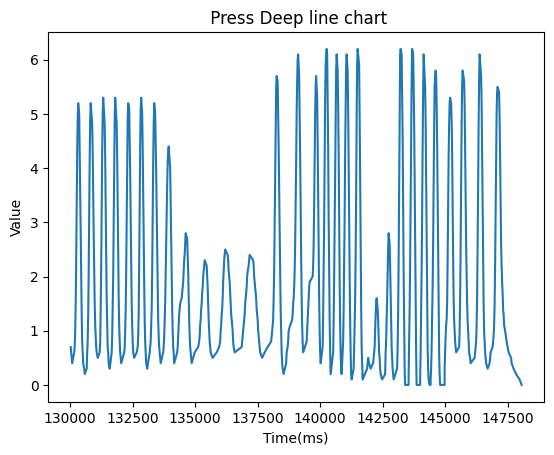

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
df1 = pd.read_csv('20230516-1_16052023_1030.csv')

# 選取"Time (ms)"小於70000的值
filtered_df = df1[df['Time (ms)'] > 130000]

# 提取時間和值的欄位
time = filtered_df['Time (ms)']
value = filtered_df['Value']*0.1

# 繪製折線圖
plt.plot(time, value)
plt.xlabel('Time(ms)')
plt.ylabel('Value')
plt.title(' Press Deep line chart')
plt.show()

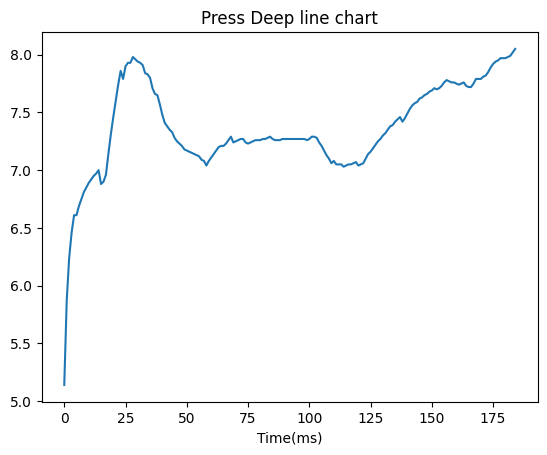

In [10]:
#讀一個CSV文件
from xml.etree import ElementTree
import pandas as pd
import matplotlib.pyplot as plt
# df = pd.read_csv('20230516-1_16052023_1030.csv')

# tree = ElementTree.parse("20230516-1_16052023_1030.csv")
# root = tree.getroot()
# 


# 讀取CSV文件
df2 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr1.csv')
# df.head()

# 提取時間和值的欄位
# time = df['Time (ms)']
value = df2['deep']

# 繪製折線圖
plt.plot( value)
plt.xlabel('Time(ms)')
# plt.ylabel('Value')
plt.title('Press Deep line chart')
plt.show()


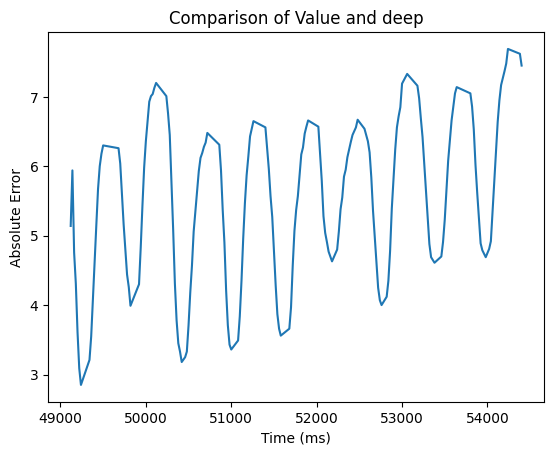

平均絕對誤差: 5.513135135135135


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
df1 = pd.read_csv('20230516-1_16052023_1030.csv')
df2 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr1.csv')

# 選取"Time (ms)"小於70000的值
filtered_df1 = df1[df1['Time (ms)'] < 70000]

# 提取時間和值的欄位
time1 = filtered_df1['Time (ms)']
value1 = filtered_df1['Value']*0.1
value2 = df2['deep']

# 計算絕對值誤差
abs_error = abs(value1 - value2)

# 計算平均絕對誤差
mean_abs_error = abs_error.mean()

# 繪製折線圖
plt.plot(time1, abs_error)
plt.xlabel('Time (ms)')
plt.ylabel('Absolute Error')
plt.title('Comparison of Value and deep')
plt.show()

print("平均絕對誤差:", mean_abs_error)


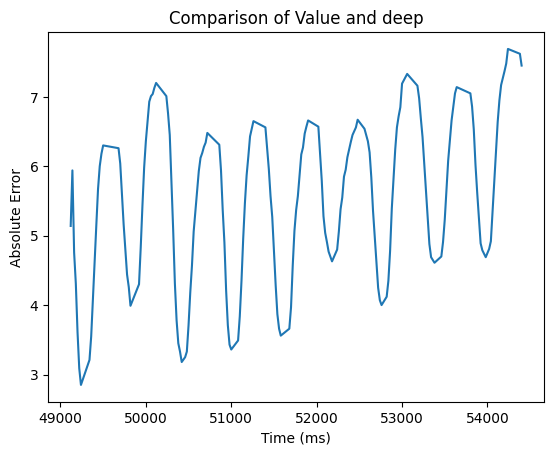

平均絕對誤差: 5.513135135135135
準確率: 0.0 %


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
df1 = pd.read_csv('20230516-1_16052023_1030.csv')
df2 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr1_1.csv')

# 選取"Time (ms)"小於70000的值
filtered_df1 = df1[df1['Time (ms)'] < 70000]

# 提取時間和值的欄位
time1 = filtered_df1['Time (ms)']
value1 = filtered_df1['Value']*0.1
value2 = df2['deep']

# 計算絕對值誤差
abs_error = abs(value1 - value2)

# 計算平均絕對誤差
mean_abs_error = abs_error.mean()

# 判斷準確率
accuracy = (abs_error < 0.5).mean() * 100

# 繪製折線圖
plt.plot(time1, abs_error)
plt.xlabel('Time (ms)')
plt.ylabel('Absolute Error')
plt.title('Comparison of Value and deep')
plt.show()

print("平均絕對誤差:", mean_abs_error)
print("準確率:", accuracy, "%")


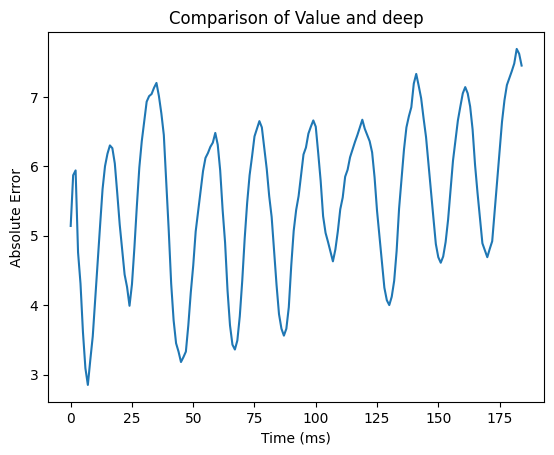

平均絕對誤差: 5.513135135135135
準確率: 0.0 %


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
df1 = pd.read_csv('20230516-1_16052023_1030.csv')
df2 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr1.csv')

# 選取"Time (ms)"小於70000的值
filtered_df1 = df1[df1['Time (ms)'] < 70000]

# 提取時間和值的欄位
# time1 = filtered_df1['Time (ms)']
value1 = filtered_df1['Value']*0.1
value2 = df2['deep']

# 計算絕對值誤差
abs_error = abs(value1 - value2)

# 計算平均絕對誤差
mean_abs_error = abs_error.mean()

# 判斷準確率
accuracy = (abs_error < 0.5).mean() * 100

# 繪製折線圖
plt.plot( abs_error)
plt.xlabel('Time (ms)')
plt.ylabel('Absolute Error')
plt.title('Comparison of Value and deep')
plt.show()

print("平均絕對誤差:", mean_abs_error)
print("準確率:", accuracy, "%")


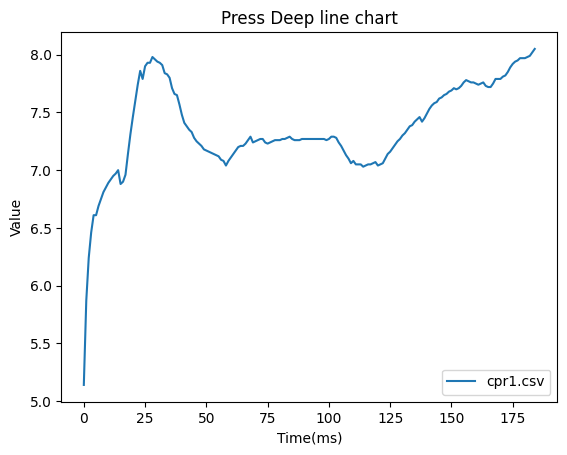

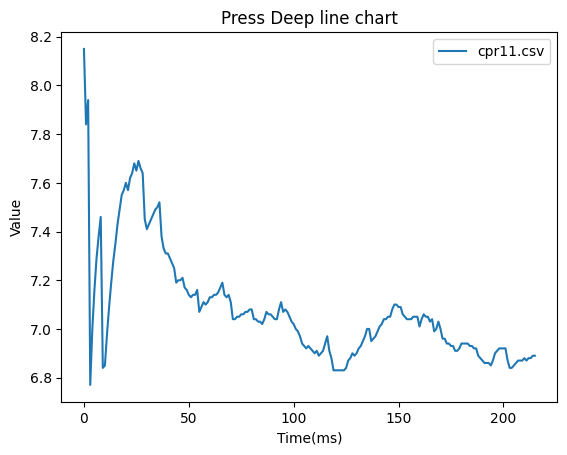

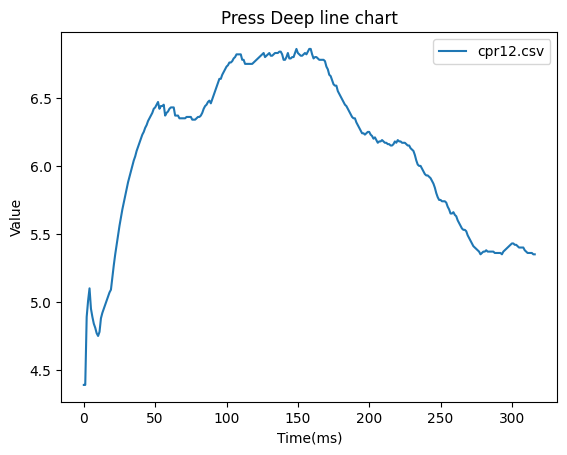

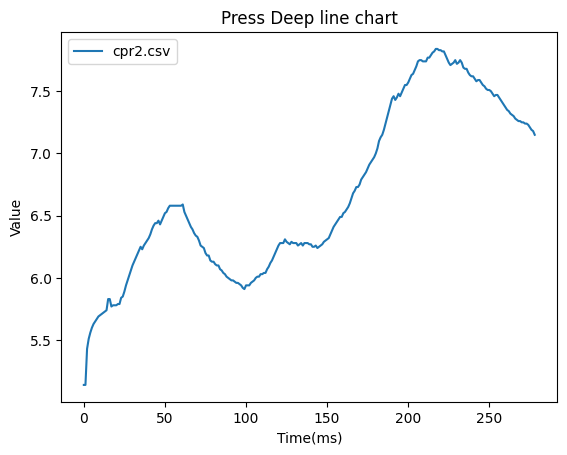

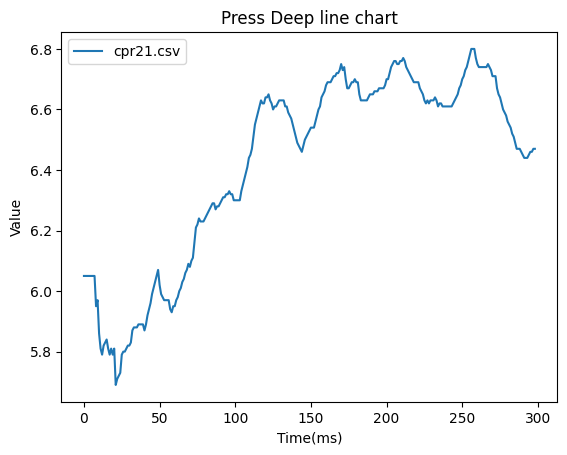

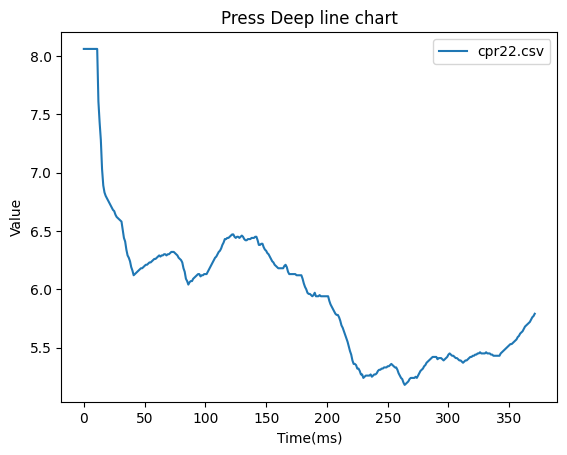

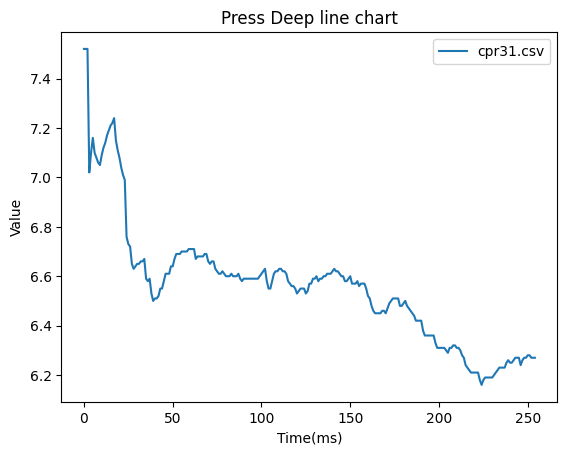

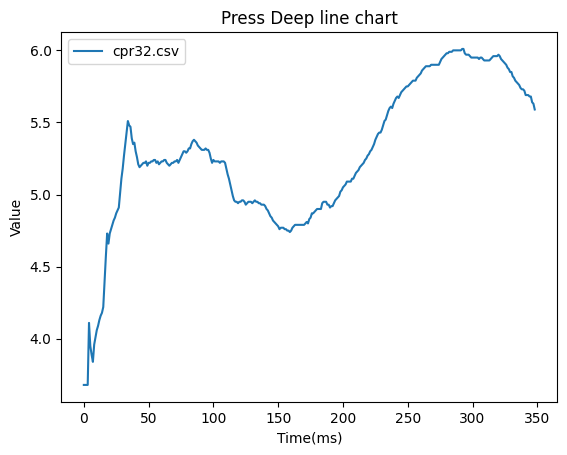

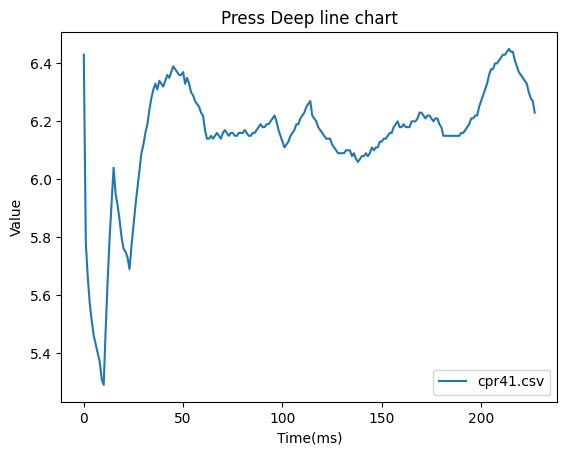

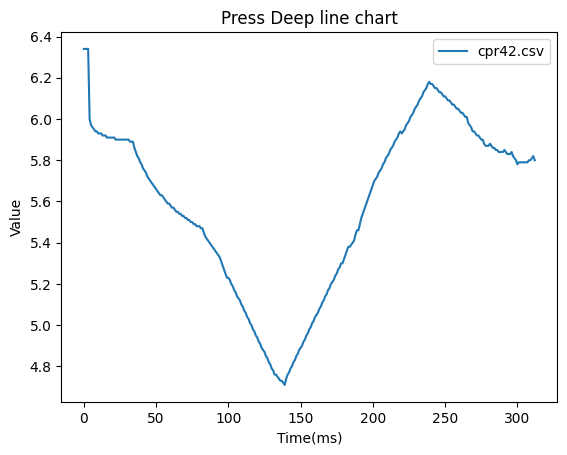

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
#讀多個CSV文件

# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 逐一讀取CSV檔案並畫出折線圖
for file_name in file_names:
    # 構造完整的檔案路徑
    file_path = os.path.join(folder_path, file_name)
    
    # 讀取CSV檔案
    df = pd.read_csv(file_path)
    
    # 提取時間和值的欄位
    # time = df['Time (ms)']
    value = df['deep']
    
    # 繪製折線圖
    plt.plot( value, label=file_name)  # 將檔案名稱作為折線圖的標籤
    
    # 設置圖表標題和圖例
    plt.xlabel('Time(ms)')
    plt.ylabel('Value')
    plt.title('Press Deep line chart')
    plt.legend()  # 顯示圖例

    plt.show()

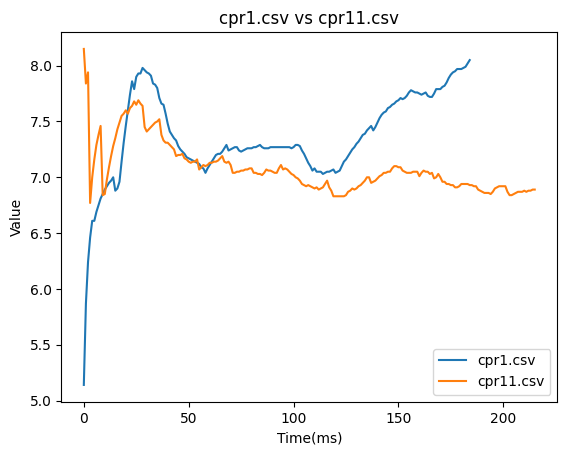

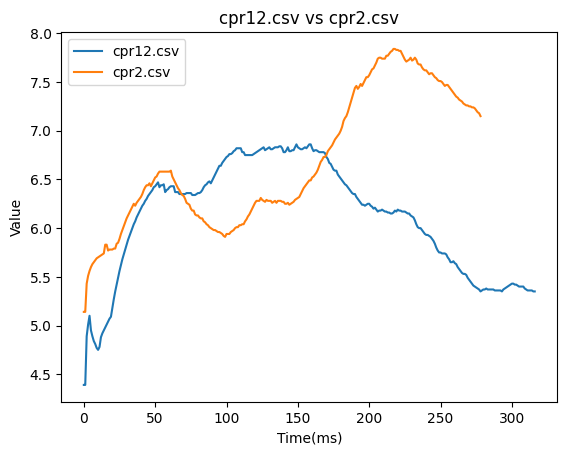

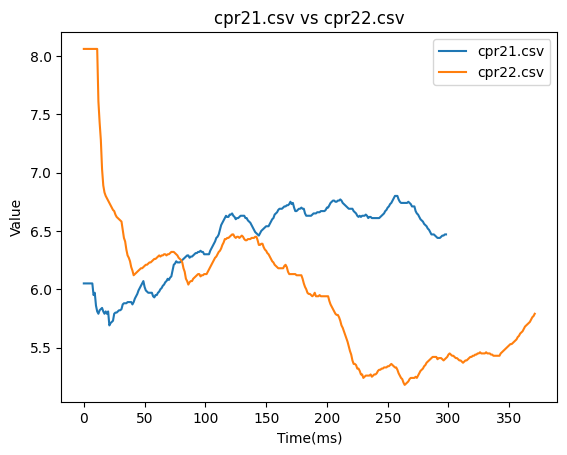

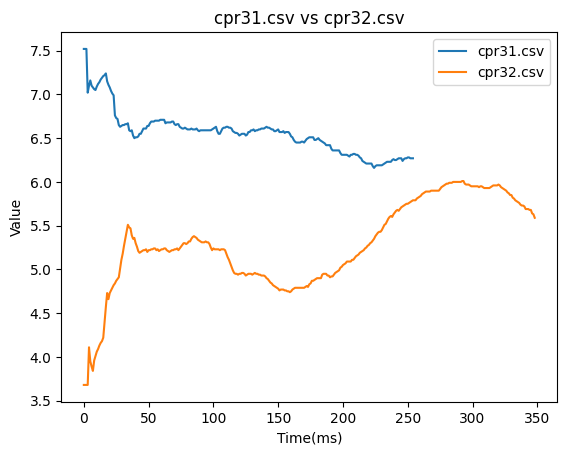

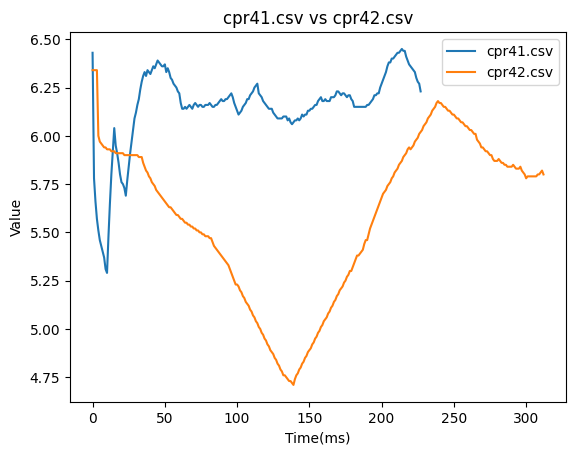

In [19]:
#讀多個檔案，並兩個圖放在一起
import os
import pandas as pd
import matplotlib.pyplot as plt

# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 每兩個CSV檔案組成一張圖
for i in range(0, len(file_names), 2):
    # 取得兩個檔案名稱
    file1 = file_names[i]
    file2 = file_names[i+1]
    
    # 構造完整的檔案路徑
    file_path1 = os.path.join(folder_path, file1)
    file_path2 = os.path.join(folder_path, file2)
    
    # 讀取兩個CSV檔案
    df1 = pd.read_csv(file_path1)
    df2 = pd.read_csv(file_path2)
    
    # 提取時間和值的欄位
    # time1 = df1['time(ms)']
    value1 = df1['deep']
    # time2 = df2['time(ms)']
    value2 = df2['deep']
    
    # 創建新的圖表
    plt.figure()
    
    # 繪製第一個折線圖
    plt.plot( value1, label=file1)
    
    # 繪製第二個折線圖
    plt.plot( value2, label=file2)
    
    # 設置圖表標題和軸標籤
    plt.xlabel('Time(ms)')
    plt.ylabel('Value')
    plt.title(f'{file1} vs {file2}')  # 使用兩個檔案名稱作為圖表標題
    plt.legend()  # 顯示圖例
    
    plt.show()  # 顯示圖表


# 計算彼此間落差

In [111]:
loss_list=list()
accuracy_list=list()

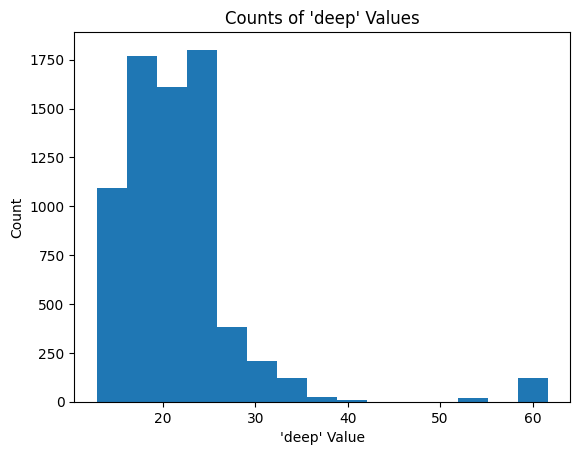

第一循環平均絕對誤差: 5.103023501762628
第一循環準確率: 0.0 %


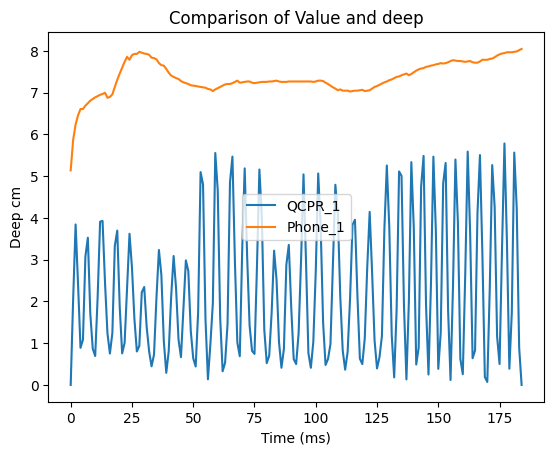

第二循環平均絕對誤差: 4.462875634975892
第二循環準確率: 0.0 %


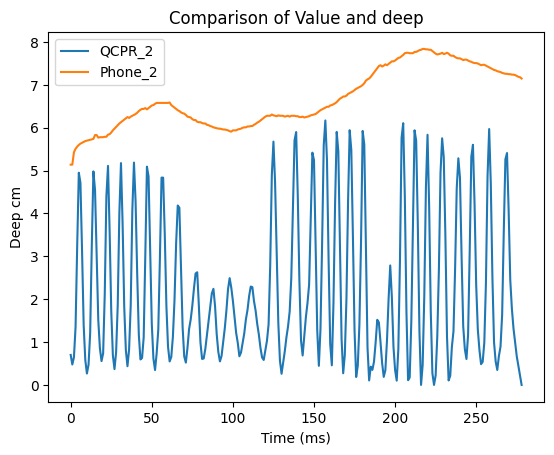

In [112]:
import pandas as pd
import numpy as np

# 讀取CSV文件
df1 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/XML/20230516-1_16052023_1030.csv')
df2 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr1_1.csv')
df3 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr1_2.csv')
# 選取"Time (ms)"大於130000的值
filtered_df1_1 = df1[df1['Time (ms)'] < 70000]
filtered_df1_2 = df1[df1['Time (ms)'] > 130000]

# 提取時間和值的欄位
value1_1 = filtered_df1_1['Value'] * 0.1
value1_2 = filtered_df1_2['Value'] * 0.1
value2 = df2['deep']
value3 = df3['deep']

# 減少 value1 的數量至與 value2 相同
reduced_value1_1 = np.interp(np.linspace(0, 1, len(value2)), np.linspace(0, 1, len(value1_1)), value1_1)
reduced_value1_2 = np.interp(np.linspace(0, 1, len(value3)), np.linspace(0, 1, len(value1_2)), value1_2)
# 計算絕對值誤差
abs_error1 = abs(reduced_value1_1 - value2)
abs_error2 = abs(reduced_value1_2 - value3)
# 計算平均絕對誤差
mean_abs_error1 = abs_error1.mean()
mean_abs_error2 = abs_error2.mean()
loss_list.append(mean_abs_error1)
loss_list.append(mean_abs_error2)

# 判斷準確率
accuracy1 = (mean_abs_error1 < 0.5).mean() * 100
accuracy2 = (mean_abs_error2 < 0.5).mean() * 100
accucary_list.append(accuracy1)
accucary_list.append(accuracy2)

print("第一循環平均絕對誤差:", mean_abs_error1)
print("第一循環準確率:", accuracy1, "%")


# 繪製折線圖
plt.plot( reduced_value1_1,label='QCPR_1')
plt.plot( value2,label='Phone_1')

plt.xlabel('Time (ms)')
plt.ylabel('Deep cm')
plt.title('Comparison of Value and deep')
plt.legend()  # 顯示圖例
plt.show()


print("第二循環平均絕對誤差:", mean_abs_error2)
print("第二循環準確率:", accuracy2, "%")

plt.plot( reduced_value1_2,label='QCPR_2')
plt.plot( value3,label='Phone_2')
plt.xlabel('Time (ms)')
plt.ylabel('Deep cm')
plt.title('Comparison of Value and deep')
plt.legend()  # 顯示圖例
plt.show()



第一循環平均絕對誤差: 4.51463608957795
第一循環準確率: 0.0 %


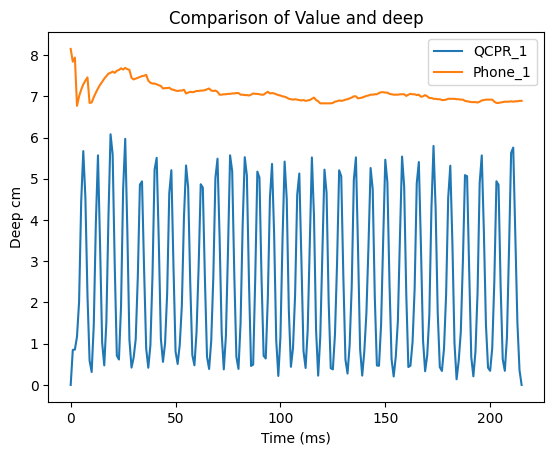

第二循環平均絕對誤差: 3.9820656470870106
第二循環準確率: 0.0 %


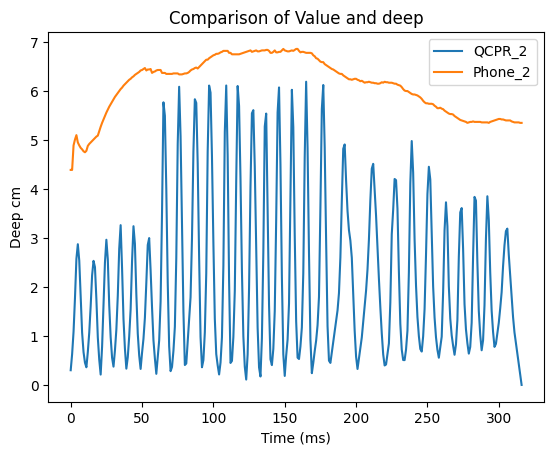

In [113]:
import pandas as pd
import numpy as np

# 讀取CSV文件
df1 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/XML/20230516-2_16052023_1036.csv')
df2 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr2_1.csv')
df3 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr2_2.csv')
# 選取"Time (ms)"大於130000的值
filtered_df1_1 = df1[df1['Time (ms)'] < 205000]
filtered_df1_2 = df1[df1['Time (ms)'] > 260000]

# 提取時間和值的欄位
value1_1 = filtered_df1_1['Value'] * 0.1
value1_2 = filtered_df1_2['Value'] * 0.1
value2 = df2['deep']
value3 = df3['deep']

# 減少 value1 的數量至與 value2 相同
reduced_value1_1 = np.interp(np.linspace(0, 1, len(value2)), np.linspace(0, 1, len(value1_1)), value1_1)
reduced_value1_2 = np.interp(np.linspace(0, 1, len(value3)), np.linspace(0, 1, len(value1_2)), value1_2)
# 計算絕對值誤差
abs_error1 = abs(reduced_value1_1 - value2)
abs_error2 = abs(reduced_value1_2 - value3)

# 計算平均絕對誤差
mean_abs_error1 = abs_error1.mean()
mean_abs_error2 = abs_error2.mean()
loss_list.append(mean_abs_error1)
loss_list.append(mean_abs_error2)

# 判斷準確率
accuracy1 = (mean_abs_error1 < 0.5).mean() * 100
accuracy2 = (mean_abs_error2 < 0.5).mean() * 100
accucary_list.append(accuracy1)
accucary_list.append(accuracy2)
print("第一循環平均絕對誤差:", mean_abs_error1)
print("第一循環準確率:", accuracy1, "%")


# 繪製折線圖
plt.plot( reduced_value1_1,label='QCPR_1')
plt.plot( value2,label='Phone_1')

plt.xlabel('Time (ms)')
plt.ylabel('Deep cm')
plt.title('Comparison of Value and deep')
plt.legend()  # 顯示圖例
plt.show()


print("第二循環平均絕對誤差:", mean_abs_error2)
print("第二循環準確率:", accuracy2, "%")

plt.plot( reduced_value1_2,label='QCPR_2')
plt.plot( value3,label='Phone_2')
plt.xlabel('Time (ms)')
plt.ylabel('Deep cm')
plt.title('Comparison of Value and deep')
plt.legend()  # 顯示圖例
plt.show()

第一循環平均絕對誤差: 3.805577428116091
第一循環準確率: 0.0 %


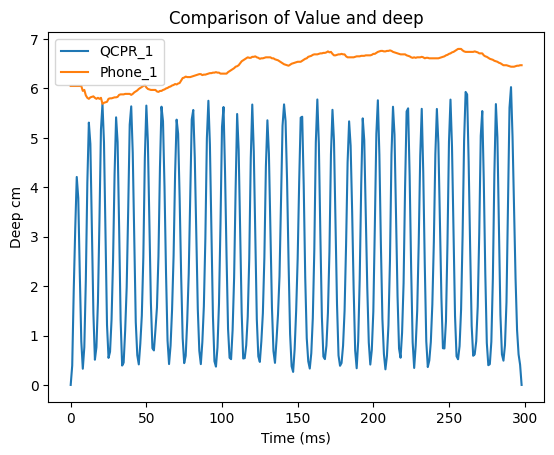

第二循環平均絕對誤差: 3.466797524852911
第二循環準確率: 0.0 %


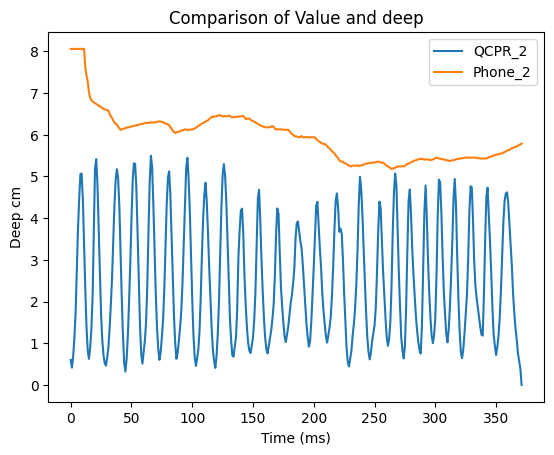

In [114]:
import pandas as pd
import numpy as np

# 讀取CSV文件
df1 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/XML/20230516-3_16052023_1040.csv')
df2 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr3_1.csv')
df3 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr3_2.csv')
# 選取"Time (ms)"大於130000的值
filtered_df1_1 = df1[df1['Time (ms)'] < 325000]
filtered_df1_2 = df1[df1['Time (ms)'] > 385000]

# 提取時間和值的欄位
value1_1 = filtered_df1_1['Value'] * 0.1
value1_2 = filtered_df1_2['Value'] * 0.1
value2 = df2['deep']
value3 = df3['deep']

# 減少 value1 的數量至與 value2 相同
reduced_value1_1 = np.interp(np.linspace(0, 1, len(value2)), np.linspace(0, 1, len(value1_1)), value1_1)
reduced_value1_2 = np.interp(np.linspace(0, 1, len(value3)), np.linspace(0, 1, len(value1_2)), value1_2)
# 計算絕對值誤差
abs_error1 = abs(reduced_value1_1 - value2)
abs_error2 = abs(reduced_value1_2 - value3)

# 計算平均絕對誤差
mean_abs_error1 = abs_error1.mean()
mean_abs_error2 = abs_error2.mean()
loss_list.append(mean_abs_error1)
loss_list.append(mean_abs_error2)

# 判斷準確率
accuracy1 = (mean_abs_error1 < 0.5).mean() * 100
accuracy2 = (mean_abs_error2 < 0.5).mean() * 100
accucary_list.append(accuracy1)
accucary_list.append(accuracy2)

print("第一循環平均絕對誤差:", mean_abs_error1)
print("第一循環準確率:", accuracy1, "%")


# 繪製折線圖
plt.plot( reduced_value1_1,label='QCPR_1')
plt.plot( value2,label='Phone_1')

plt.xlabel('Time (ms)')
plt.ylabel('Deep cm')
plt.title('Comparison of Value and deep')
plt.legend()  # 顯示圖例
plt.show()


print("第二循環平均絕對誤差:", mean_abs_error2)
print("第二循環準確率:", accuracy2, "%")

plt.plot( reduced_value1_2,label='QCPR_2')
plt.plot( value3,label='Phone_2')
plt.xlabel('Time (ms)')
plt.ylabel('Deep cm')
plt.title('Comparison of Value and deep')
plt.legend()  # 顯示圖例
plt.show()

第一循環平均絕對誤差: 3.9565141269106068
第一循環準確率: 0.0 %


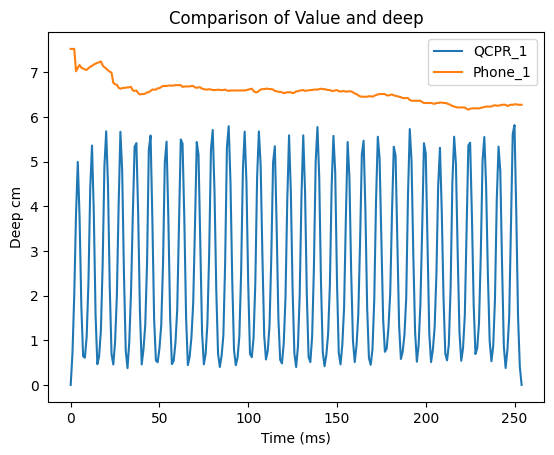

第二循環平均絕對誤差: 3.1389818199782624
第二循環準確率: 0.0 %


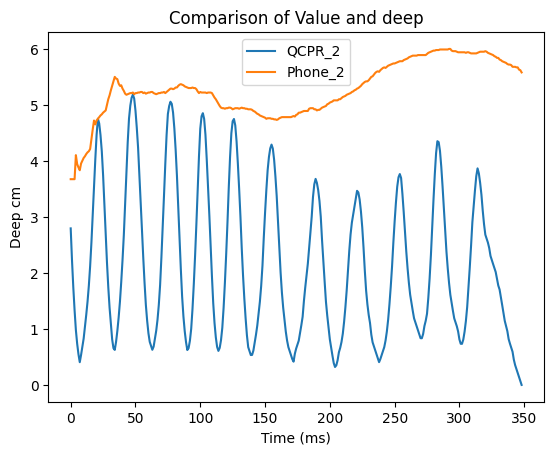

In [115]:
import pandas as pd
import numpy as np

# 讀取CSV文件
df1 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/XML/20230516-4_16052023_1047.csv')
df2 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr4_1.csv')
df3 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr4_2.csv')
# 選取"Time (ms)"大於130000的值
filtered_df1_1 = df1[df1['Time (ms)'] < 445000]
filtered_df1_2 = df1[df1['Time (ms)'] > 515000]

# 提取時間和值的欄位
value1_1 = filtered_df1_1['Value'] * 0.1
value1_2 = filtered_df1_2['Value'] * 0.1
value2 = df2['deep']
value3 = df3['deep']

# 減少 value1 的數量至與 value2 相同
reduced_value1_1 = np.interp(np.linspace(0, 1, len(value2)), np.linspace(0, 1, len(value1_1)), value1_1)
reduced_value1_2 = np.interp(np.linspace(0, 1, len(value3)), np.linspace(0, 1, len(value1_2)), value1_2)
# 計算絕對值誤差
abs_error1 = abs(reduced_value1_1 - value2)
abs_error2 = abs(reduced_value1_2 - value3)

# 計算平均絕對誤差
mean_abs_error1 = abs_error1.mean()
mean_abs_error2 = abs_error2.mean()
loss_list.append(mean_abs_error1)
loss_list.append(mean_abs_error2)

# 判斷準確率
accuracy1 = (mean_abs_error1 < 0.5).mean() * 100
accuracy2 = (mean_abs_error2 < 0.5).mean() * 100
accucary_list.append(accuracy1)
accucary_list.append(accuracy2)

print("第一循環平均絕對誤差:", mean_abs_error1)
print("第一循環準確率:", accuracy1, "%")


# 繪製折線圖
plt.plot( reduced_value1_1,label='QCPR_1')
plt.plot( value2,label='Phone_1')

plt.xlabel('Time (ms)')
plt.ylabel('Deep cm')
plt.title('Comparison of Value and deep')
plt.legend()  # 顯示圖例
plt.show()


print("第二循環平均絕對誤差:", mean_abs_error2)
print("第二循環準確率:", accuracy2, "%")

plt.plot( reduced_value1_2,label='QCPR_2')
plt.plot( value3,label='Phone_2')
plt.xlabel('Time (ms)')
plt.ylabel('Deep cm')
plt.title('Comparison of Value and deep')
plt.legend()  # 顯示圖例
plt.show()

第一循環平均絕對誤差: 3.577610325372905
第一循環準確率: 0.0 %


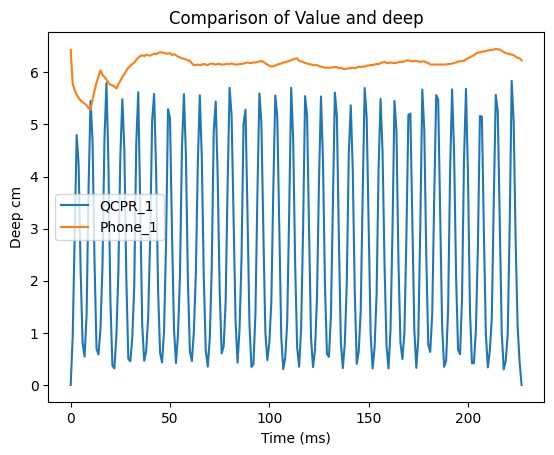

第二循環平均絕對誤差: 3.459607397394937
第二循環準確率: 0.0 %


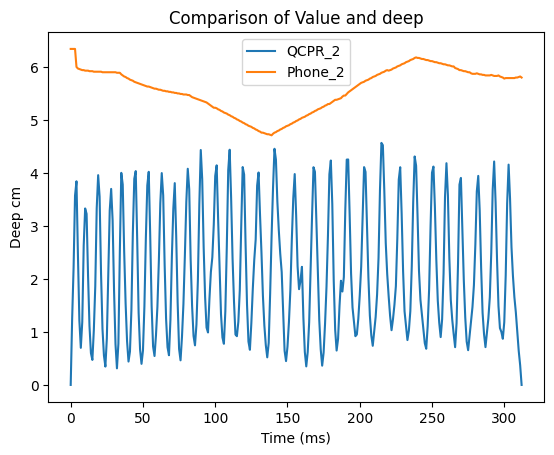

In [116]:
import pandas as pd
import numpy as np

# 讀取CSV文件
df1 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/XML/20230516-5_16052023_1050.csv')
df2 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr5_1.csv')
df3 = pd.read_csv('C:/Users/xiang/Desktop/QCPR按壓結果/手機偵測結果/cpr5_2.csv')
# 選取"Time (ms)"大於130000的值
filtered_df1_1 = df1[df1['Time (ms)'] < 565000]
filtered_df1_2 = df1[df1['Time (ms)'] > 615000]

# 提取時間和值的欄位
value1_1 = filtered_df1_1['Value'] * 0.1
value1_2 = filtered_df1_2['Value'] * 0.1
value2 = df2['deep']
value3 = df3['deep']

# 減少 value1 的數量至與 value2 相同
reduced_value1_1 = np.interp(np.linspace(0, 1, len(value2)), np.linspace(0, 1, len(value1_1)), value1_1)
reduced_value1_2 = np.interp(np.linspace(0, 1, len(value3)), np.linspace(0, 1, len(value1_2)), value1_2)
# 計算絕對值誤差
abs_error1 = abs(reduced_value1_1 - value2)
abs_error2 = abs(reduced_value1_2 - value3)
# 計算平均絕對誤差
mean_abs_error1 = abs_error1.mean()
mean_abs_error2 = abs_error2.mean()
loss_list.append(mean_abs_error1)
loss_list.append(mean_abs_error2)

# 判斷準確率
accuracy1 = (mean_abs_error1 < 0.5).mean() * 100
accuracy2 = (mean_abs_error2 < 0.5).mean() * 100
accucary_list.append(accuracy1)
accucary_list.append(accuracy2)
print("第一循環平均絕對誤差:", mean_abs_error1)
print("第一循環準確率:", accuracy1, "%")


# 繪製折線圖
plt.plot( reduced_value1_1,label='QCPR_1')
plt.plot( value2,label='Phone_1')

plt.xlabel('Time (ms)')
plt.ylabel('Deep cm')
plt.title('Comparison of Value and deep')
plt.legend()  # 顯示圖例
plt.show()


print("第二循環平均絕對誤差:", mean_abs_error2)
print("第二循環準確率:", accuracy2, "%")

plt.plot( reduced_value1_2,label='QCPR_2')
plt.plot( value3,label='Phone_2')
plt.xlabel('Time (ms)')
plt.ylabel('Deep cm')
plt.title('Comparison of Value and deep')
plt.legend()  # 顯示圖例
plt.show()

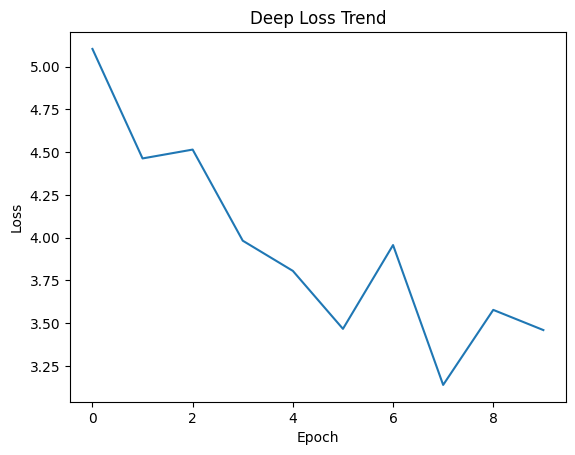

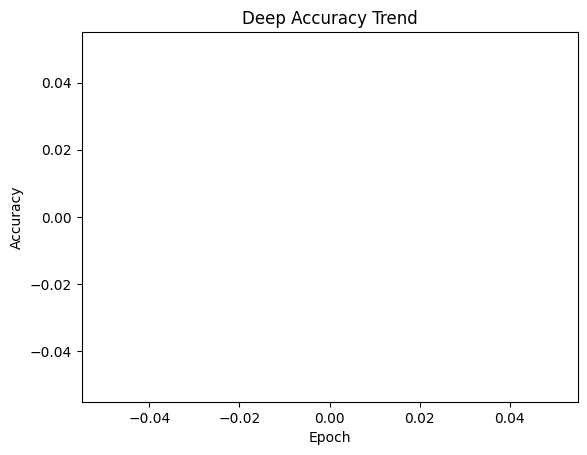

In [120]:
import matplotlib.pyplot as plt

# 繪製 loss_list 的折線圖
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep Loss Trend')
plt.show()

# 繪製 accuracy_list 的折線圖
plt.plot(accuracy_list)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Deep Accuracy Trend')
plt.show()



In [118]:
loss_list

[5.103023501762628,
 4.462875634975892,
 4.51463608957795,
 3.9820656470870106,
 3.805577428116091,
 3.466797524852911,
 3.9565141269106068,
 3.1389818199782624,
 3.577610325372905,
 3.459607397394937]

In [1]:
!pip3 install gTTS
!pip3 install pygame

     ---------------------------------------- 10.7/10.7 MB 3.1 MB/s eta 0:00:00


In [5]:
!pip install pyttsx3


     ---------------------------------------- 184.3/184.3 kB 1.9 MB/s eta 0:00:00


'sudo' 不是內部或外部命令、可執行的程式或批次檔。


In [10]:
import pyttsx3

# 初始化
engine = pyttsx3.init()

voices = engine.getProperty('voices')
# 語速控制
rate = engine.getProperty('rate')
print(rate)
engine.setProperty('rate', rate)

# 音量控制
volume = engine.getProperty('volume')
print(volume)
engine.setProperty('volume', volume+0.25)

engine.say('hello world')
engine.say('你好，世界')
# 朗讀一次
engine.runAndWait()
engine.say('語音合成開始')
engine.say('我會說中文了，開森，開森')
engine.runAndWait()

engine.say('The quick brown fox jumped over the lazy dog.')
engine.runAndWait()

160
1.0


In [11]:
import time
from gtts import gTTS
import tempfile
from pygame import mixer
import datetime
from datetime import datetime
from time import strftime
 
def say(text, filename=None):
    with tempfile.NamedTemporaryFile(delete=True) as temp:
        tts = gTTS(text, lang='en',slow=False)
        if filename is None:
            filename = "{}.mp3".format(temp.name)
        tts.save(filename)
        mixer.init()
        mixer.music.load(filename)
        mixer.music.play()
        while mixer.music.get_busy() == True:
            continue
        mixer.quit()

while(1):
    hour=datetime.now().strftime('%H')
    minute=datetime.now().strftime('%M')
    second=datetime.now().strftime('%S')
    # print(second)
    while second == '00':
        say("It is"+hour+"hour and"+minute+"", "introduction.mp3")
        second=datetime.now().strftime('%S')

    time.sleep(1)

KeyboardInterrupt: 

# 將某xml檔的某個值來做改變

## 改停車格資料

In [ ]:
import os
import xml.etree.ElementTree as ET

# 資料夾路徑
# folder_path = 'D:\Dataset\parking_data\Group4\Annotation/'
folder_path = 'D:\Dataset\parking_data\Group4\Annotation/dscds'

# 讀取資料夾中的所有檔案
file_list = os.listdir(folder_path)

# 迭代處理每個檔案
for file_name in file_list:
    if file_name.endswith('.xml'):
        # XML檔案路徑
        xml_path = os.path.join(folder_path, file_name)
        
        # 讀取XML檔案
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        # 修改需要的元素值
        for obj in root.iter('object'):
            name_elem = obj.find('name')
            name_elem.text = '1'
        
        # 將修改後的XML保存回原始文件
        tree.write(xml_path)

## 改信號資料

In [1]:
import os
import xml.etree.ElementTree as ET

# 資料夾路徑
folder_path = 'D:\Dataset\signal_data\曾信升/Annotation'

# 讀取資料夾中的所有檔案
file_list = os.listdir(folder_path)

# 迭代處理每個檔案
for file_name in file_list:
    if file_name.endswith('.xml'):
        # XML檔案路徑
        xml_path = os.path.join(folder_path, file_name)
        
        # 讀取XML檔案
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        # 修改需要的元素值
        for obj in root.iter('object'):
            name_elem = obj.find('name')
            if name_elem.text == '1':
                name_elem.text = 'stop'
            elif name_elem.text == '2':
                name_elem.text = 'left'
            elif name_elem.text == '3':
                name_elem.text = 'right'
            elif name_elem.text == '4':
                name_elem.text = 'back'
            elif name_elem.text == '5':
                name_elem.text = 'forward'
        
        # 將修改後的XML保存回原始文件
        tree.write(xml_path)


In [2]:
import os
import xml.etree.ElementTree as ET

# 資料夾路徑
folder_path = 'D:\Dataset\signal_data\曾信升/Annotation'

# 讀取資料夾中的所有檔案
file_list = os.listdir(folder_path)

# 迭代處理每個檔案
for file_name in file_list:
    if file_name.endswith('.xml'):
        # XML檔案路徑
        xml_path = os.path.join(folder_path, file_name)
        
        # 讀取XML檔案
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        # 修改需要的元素值
        for obj in root.iter('object'):
            name_elem = obj.find('name')
            if name_elem.text == 'forward':
                name_elem.text = '1'
            elif name_elem.text == 'stop':
                name_elem.text = '2'
            elif name_elem.text == 'left':
                name_elem.text = '3'
            elif name_elem.text == 'right':
                name_elem.text = '4'
            elif name_elem.text == 'back':
                name_elem.text = '5'
        
        # 將修改後的XML保存回原始文件
        tree.write(xml_path)

In [ ]:
# 查看標準差、平均值、中位數、統計分布和推薦倍率

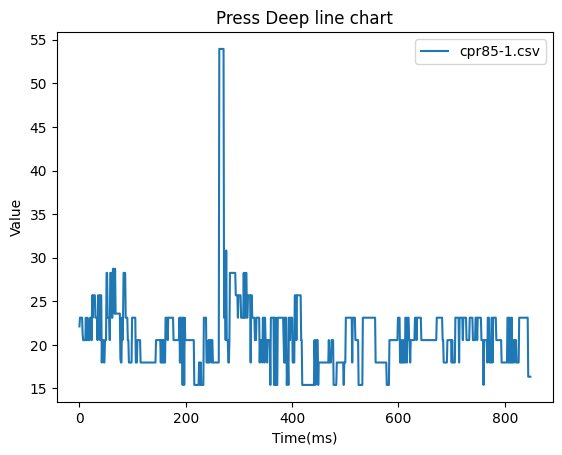

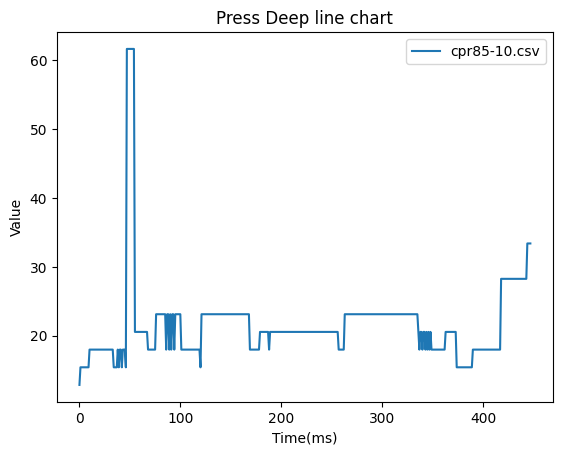

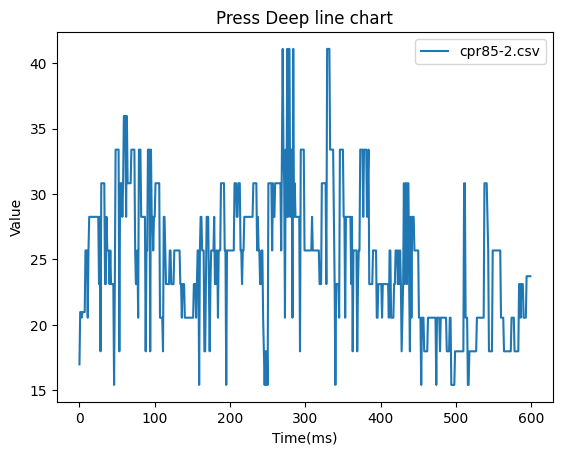

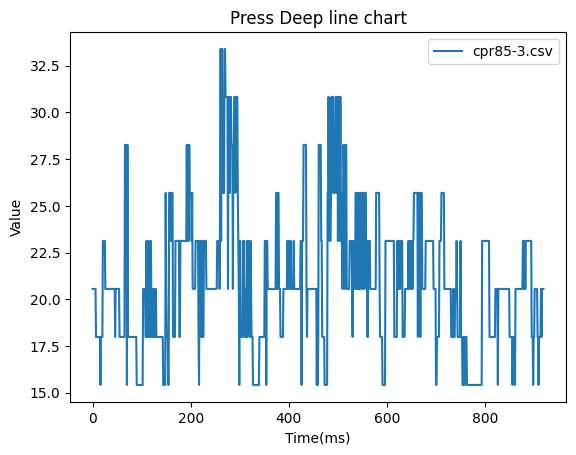

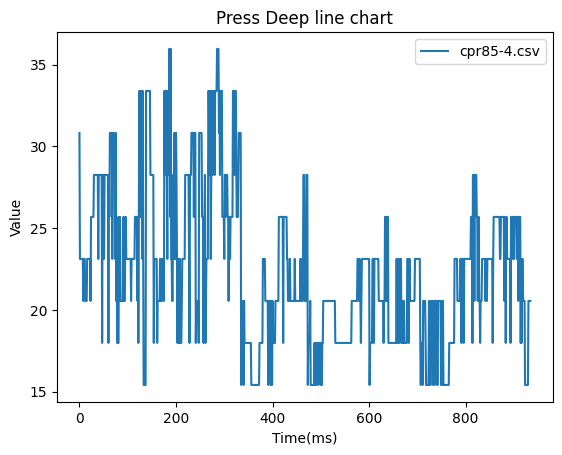

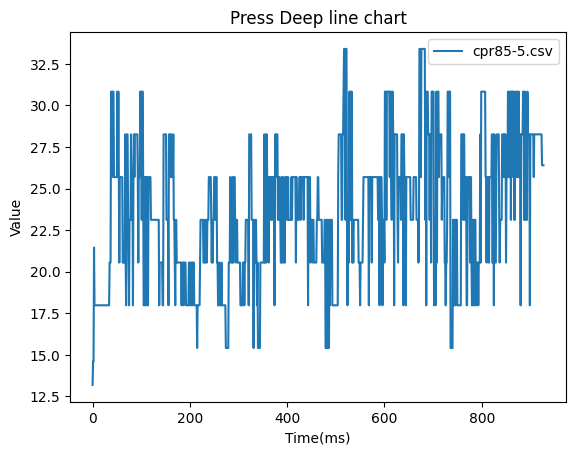

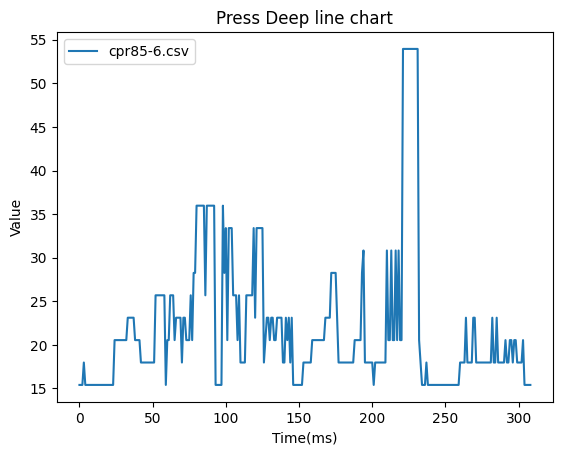

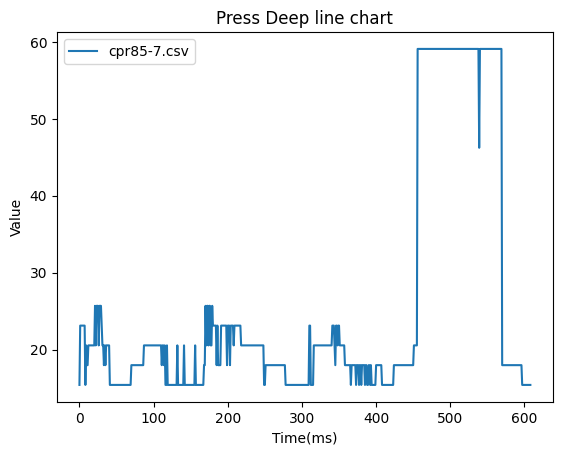

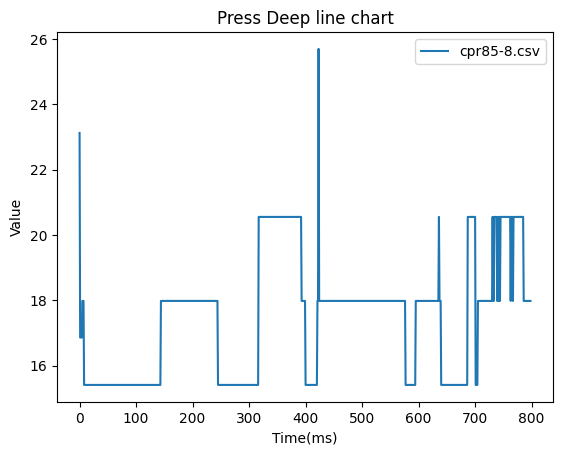

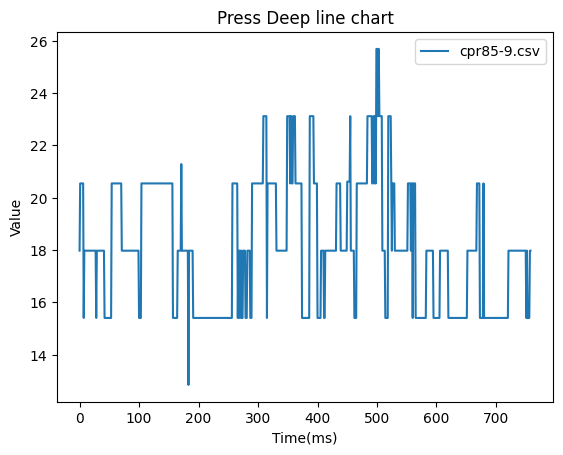

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
#讀多個CSV文件

# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/85app'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 逐一讀取CSV檔案並畫出折線圖
for file_name in file_names:
    # 構造完整的檔案路徑
    file_path = os.path.join(folder_path, file_name)
    
    # 讀取CSV檔案
    df = pd.read_csv(file_path)
    
    # 提取時間和值的欄位
    # time = df['Time (ms)']
    value = df['deep']
    
    # 繪製折線圖
    plt.plot( value, label=file_name)  # 將檔案名稱作為折線圖的標籤
    
    # 設置圖表標題和圖例
    plt.xlabel('Time(ms)')
    plt.ylabel('Value')
    plt.title('Press Deep line chart')
    plt.legend()  # 顯示圖例

    plt.show()

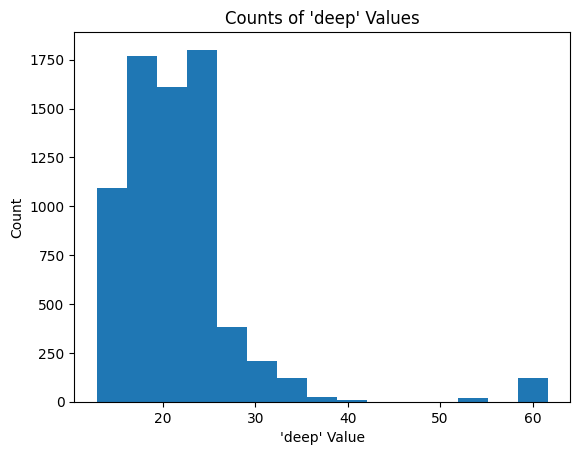

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/85app'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 儲存所有'deep'值的列表
deep_values = []

# 逐一讀取CSV檔案
for file_name in file_names:
    # 構造完整的檔案路徑
    file_path = os.path.join(folder_path, file_name)
    
    # 讀取CSV檔案
    df = pd.read_csv(file_path)
    
    # 提取'deep'欄位的值並添加到列表中
    deep_values.extend(df['deep'].tolist())

# 繪製計數圖
plt.hist(deep_values, bins=15)  # 設定直方圖的區間數量，這裡設定為10個區間

# 設定圖表標題和軸標籤
plt.title("Counts of 'deep' Values")
plt.xlabel("'deep' Value")
plt.ylabel("Count")

# 顯示圖表
plt.show()


In [31]:
import os
import pandas as pd

# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/85app'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 儲存所有'deep'值的列表
deep_values = []

# 逐一讀取CSV檔案
for file_name in file_names:
    # 構造完整的檔案路徑
    file_path = os.path.join(folder_path, file_name)
    
    # 讀取CSV檔案
    df = pd.read_csv(file_path)
    
    # 提取'deep'欄位的值並添加到列表中
    deep_values.extend(df['deep'].tolist())

# 計算平均值和標準差、中位數
average = sum(deep_values) / len(deep_values)
std_dev = pd.Series(deep_values).std()
median = pd.Series(deep_values).median()


# 輸出結果
print(f'平均值：{average}')
print(f'標準差：{std_dev}')
print(f'中位數：{median}')

平均值：21.743963107882152
標準差：6.8202471906021795
中位數：20.55


In [32]:
import os
import pandas as pd
import numpy as np

# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/85app'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 初始化最小誤差值和對應的倍率
min_error = float('inf')
best_scaling_factor = None

# 使用迴圈進行測試
for scaling_factor in np.arange(2, 7.1,0.1):  # 縮放倍率從5到6
    # 建立空的絕對誤差列表
    abs_errors = []
    
    # 對每個CSV檔案進行測試
    for file_name in file_names:
        # 構造完整的檔案路徑
        file_path = os.path.join(folder_path, file_name)
        
        # 讀取CSV檔案
        df = pd.read_csv(file_path)
        
        # 縮放'deep'欄位的值
        scaled_values = df['deep']  /scaling_factor  # 將縮放倍率轉換為小數
        
        # # 縮減 deep_values 的大小與 scaled_values 相同
        # reduced_deep_values = deep_values[:len(scaled_values)]
        
        # 計算絕對誤差
        # if(5<=scaled_values<=6:
        #     abs_error = 0
        abs_error = np.mean(np.abs(np.where(scaled_values > 6, scaled_values - 6, np.where(scaled_values < 5, scaled_values - 5, 0))))
        
        # 將絕對誤差添加到列表中
        abs_errors.append(abs_error)
    
    # 計算平均絕對誤差
    mean_abs_error = sum(abs_errors) / len(abs_errors)
    
    # 檢查平均絕對誤差是否在5到6之間，並更新最小誤差值和相應的倍率
    # if 5 <= mean_abs_error <= 6:
    if mean_abs_error < min_error:
        min_error = mean_abs_error
        best_scaling_factor = scaling_factor # 將倍率轉換回小數

# 輸出結果
print("最小平均絕對誤差:", min_error)
print("最佳縮放倍率:", best_scaling_factor)

最小平均絕對誤差: 0.7222850903273064
最佳縮放倍率: 3.9000000000000017


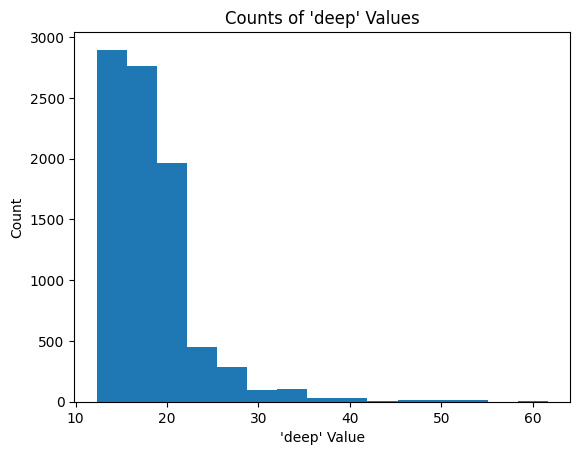

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/105app'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 儲存所有'deep'值的列表
deep_values = []

# 逐一讀取CSV檔案
for file_name in file_names:
    # 構造完整的檔案路徑
    file_path = os.path.join(folder_path, file_name)
    
    # 讀取CSV檔案
    df = pd.read_csv(file_path)
    
    # 提取'deep'欄位的值並添加到列表中
    deep_values.extend(df['deep'].tolist())

# 繪製計數圖
plt.hist(deep_values, bins=15)  # 設定直方圖的區間數量，這裡設定為10個區間

# 設定圖表標題和軸標籤
plt.title("Counts of 'deep' Values")
plt.xlabel("'deep' Value")
plt.ylabel("Count")

# 顯示圖表
plt.show()

In [33]:
# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/105app'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 初始化最小誤差值和對應的倍率
min_error = float('inf')
best_scaling_factor = None

# 使用迴圈進行測試
for scaling_factor in np.arange(2, 6.1,0.1):  # 縮放倍率從5到6
    # 建立空的絕對誤差列表
    abs_errors = []
    
    # 對每個CSV檔案進行測試
    for file_name in file_names:
        # 構造完整的檔案路徑
        file_path = os.path.join(folder_path, file_name)
        
        # 讀取CSV檔案
        df = pd.read_csv(file_path)
        
        # 縮放'deep'欄位的值
        scaled_values = df['deep']  /scaling_factor  # 將縮放倍率轉換為小數
        
        # # 縮減 deep_values 的大小與 scaled_values 相同
        # reduced_deep_values = deep_values[:len(scaled_values)]
        
        # 計算絕對誤差
        # if(5<=scaled_values<=6:
        #     abs_error = 0
        abs_error = np.mean(np.abs(np.where(scaled_values > 6, scaled_values - 6, np.where(scaled_values < 5, scaled_values - 5, 0))))
        
        # 將絕對誤差添加到列表中
        abs_errors.append(abs_error)
    
    # 計算平均絕對誤差
    mean_abs_error = sum(abs_errors) / len(abs_errors)
    
    # 檢查平均絕對誤差是否在5到6之間，並更新最小誤差值和相應的倍率
    # if 5 <= mean_abs_error <= 6:
    if mean_abs_error < min_error:
        min_error = mean_abs_error
        best_scaling_factor = scaling_factor # 將倍率轉換回小數

# 輸出結果
print("最小平均絕對誤差:", min_error)
print("最佳縮放倍率:", best_scaling_factor)


最小平均絕對誤差: 0.4349757225920742
最佳縮放倍率: 3.4000000000000012


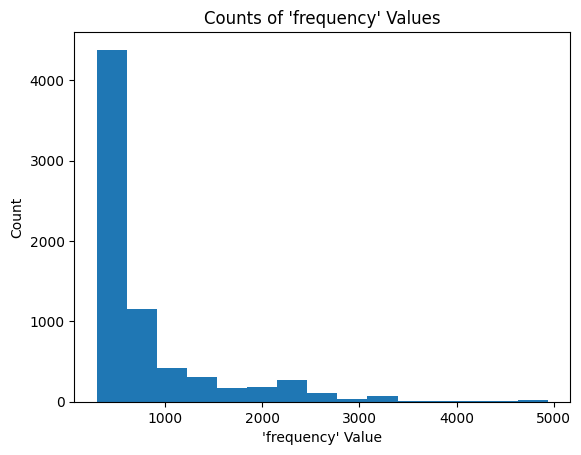

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/85app'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 儲存所有'deep'值的列表
frequency_values = []

# 逐一讀取CSV檔案
for file_name in file_names:
    # 構造完整的檔案路徑
    file_path = os.path.join(folder_path, file_name)
    
    # 讀取CSV檔案
    df = pd.read_csv(file_path)
    
    # 提取'deep'欄位的值並添加到列表中
    frequency_values.extend(df['frequency'].tolist())

# 繪製計數圖
plt.hist(frequency_values, bins=15)  # 設定直方圖的區間數量，這裡設定為10個區間

# 設定圖表標題和軸標籤
plt.title("Counts of 'frequency' Values")
plt.xlabel("'frequency' Value")
plt.ylabel("Count")

# 顯示圖表
plt.show()

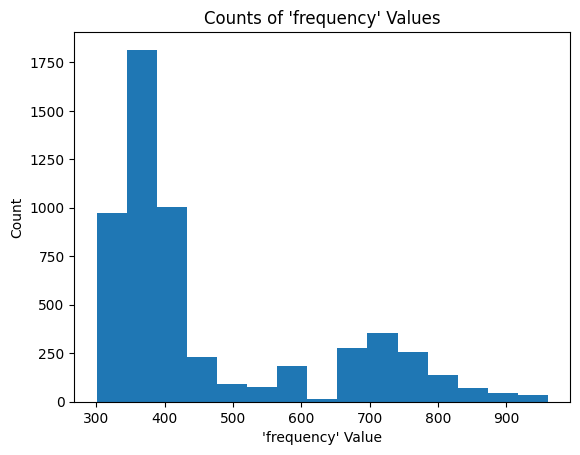

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# 設定資料夾路徑
folder_path = 'C:/Users/xiang/Desktop/QCPR按壓結果/85app'

# 獲取資料夾中的所有CSV檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 儲存所有 'frequency' 值小於 1000 的列表
frequency_values = []

# 逐一讀取CSV檔案
for file_name in file_names:
    # 構造完整的檔案路徑
    file_path = os.path.join(folder_path, file_name)
    
    # 讀取CSV檔案
    df = pd.read_csv(file_path)
    
    # 過濾並提取 'frequency' 值小於 1000 的值並添加到列表中
    filtered_values = df[df['frequency'] < 1000]['frequency']
    frequency_values.extend(filtered_values.tolist())

# 繪製計數圖
plt.hist(frequency_values, bins=15)  # 設定直方圖的區間數量，這裡設定為15個區間

# 設定圖表標題和軸標籤
plt.title("Counts of 'frequency' Values")
plt.xlabel("'frequency' Value")
plt.ylabel("Count")

# 顯示圖表
plt.show()
